In [1]:
# Importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Observing the Dataset

In [2]:
# Reading in data file
# I was able to obtain this dataset from Kaggle  
MovieDataSet = pd.read_csv('/Users/josehernandez/Desktop/MoviesOnStreamingPlatforms_updated.csv')

MovieDataSet.head(10)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
6,6,7,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
7,7,8,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
8,8,9,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
9,9,10,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


# Exploring the data

In [5]:
MovieDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
Unnamed: 0         16744 non-null int64
ID                 16744 non-null int64
Title              16744 non-null object
Year               16744 non-null int64
Age                7354 non-null object
IMDb               16173 non-null float64
Rotten Tomatoes    5158 non-null object
Netflix            16744 non-null int64
Hulu               16744 non-null int64
Prime Video        16744 non-null int64
Disney+            16744 non-null int64
Type               16744 non-null int64
Directors          16018 non-null object
Genres             16469 non-null object
Country            16309 non-null object
Language           16145 non-null object
Runtime            16152 non-null float64
dtypes: float64(2), int64(8), object(7)
memory usage: 2.2+ MB


In [4]:
MovieDataSet.describe()

,Unnamed: 0,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16744.000000,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,8371.500000,8372.500000,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,0.0,93.413447
std,4833.720789,4833.720789,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,0.0,28.219222
min,0.000000,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4185.750000,4186.750000,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,8371.500000,8372.500000,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,12557.250000,12558.250000,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,16743.000000,16744.000000,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000


### Movie ranking based on IMDb scores

In [42]:
# Using the describe function we can see that the top rated movies are in the ranking
# 9.3
Highest_Movies = MovieDataSet[(MovieDataSet['IMDb'] > 6.9)][['Title','IMDb']]
Highest_Movies

,Title,IMDb
0,Inception,8.8
1,The Matrix,8.7
2,Avengers: Infinity War,8.5
3,Back to the Future,8.5
4,"The Good, the Bad and the Ugly",8.8
...,...,...
16709,Prowlers of the Everglades,8.0
16714,Drain The Ocean: WWII,7.0
16717,Kingdom of the Blue Whale,7.3
16722,Secrets of Life,7.2


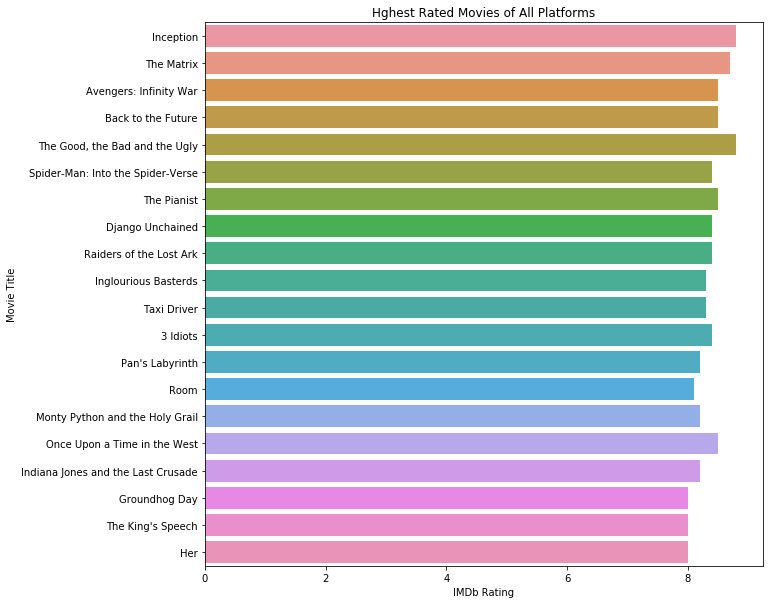

In [83]:

# Highest Ranking movies
xbar = Highest_Movies['IMDb'].head(20)
ybar = Highest_Movies['Title'].head(20)


plt.figure(figsize = (10,10))

sns.barplot(xbar,ybar,data = Highest_Movies)
plt.ylabel('Movie Title')
plt.xlabel('IMDb Rating')
plt.title('Hghest Rated Movies of All Platforms')
plt.show()

# Movie count based on platform

In [221]:
Netflix_count_movies = len(MovieDataSet[MovieDataSet['Netflix'] == 1].index)
Netflix_count_movies

3560

In [222]:
Hulu_count_movies = len(MovieDataSet[MovieDataSet['Hulu'] == 1].index)
Hulu_count_movies

903

In [223]:
Prime_count_movies = len(MovieDataSet[MovieDataSet['Prime Video'] == 1].index)
Prime_count_movies

12354

In [224]:
Disney_count_movies = len(MovieDataSet[MovieDataSet['Disney+'] == 1].index)
Disney_count_movies

564

In [225]:
# Organizing the data above

Platform_Movies = [Netflix_count_movies,Hulu_count_movies,Prime_count_movies,Disney_count_movies]

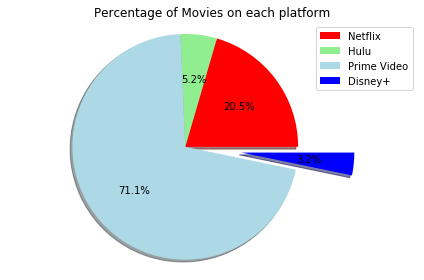

In [226]:
# Plotting

labels = ['Netflix', 'Hulu', 'Prime Video','Disney+']
colors = ['red', 'lightgreen', 'lightblue', 'blue']
explode = (0.0,0.0,0.0,0.5)

pie = plt.pie(Platform_Movies, autopct='%1.1f%%', shadow = True, explode = explode, colors = colors)

plt.title('Percentage of Movies on each platform')
plt.axis('equal')
plt.legend(labels, loc = "upper right")
plt.tight_layout()

In [111]:
# Disney being the least could be becuase it just released in late 2019

# Highest rated movie in each platform


In [198]:
Highest_Movie_Netflix = MovieDataSet[(MovieDataSet['IMDb'] > 6.9) & MovieDataSet['Netflix'] == 1][
    ['Title','IMDb']].sort_values('IMDb',ascending = False)

Top_rate_netflix = Highest_Movie_Netflix.head(10)
Top_rate_netflix

,Title,IMDb
1292,My Next Guest with David Letterman and Shah Ru...,9.3
947,Natsamrat,9.1
0,Inception,8.8
4,"The Good, the Bad and the Ugly",8.8
1,The Matrix,8.7
1458,Untamed Romania,8.7
1311,Eh Janam Tumhare Lekhe,8.7
1979,One Heart: The A.R. Rahman Concert Film,8.7
1214,Bill Hicks: Relentless,8.7
1468,K. D.,8.6


In [197]:
Highest_Movie_Hulu = MovieDataSet[(MovieDataSet['IMDb'] > 6.9) & MovieDataSet['Hulu'] == 1][
    ['Title','IMDb']].sort_values('IMDb',ascending = False)

Top_rate_hulu = Highest_Movie_Hulu.head(10)
Top_rate_hulu

,Title,IMDb
3560,The Dark Knight,9.0
3561,GoodFellas,8.7
3564,The Green Mile,8.6
3562,Parasite,8.6
3566,Grave of the Fireflies,8.5
4283,Brad Paisley Thinks He's Special,8.5
3742,Andy Irons: Kissed by God,8.3
3890,Larger than Life: The Kevyn Aucoin Story,8.3
3563,Good Will Hunting,8.3
3580,Free Solo,8.2


In [199]:
Highest_Movie_Prime = MovieDataSet[(MovieDataSet['IMDb'] > 6.9) & MovieDataSet['Prime Video'] == 1][
    ['Title','IMDb']].sort_values('IMDb',ascending = False)

Top_rate_prime = Highest_Movie_Prime.head(10)
Top_rate_prime

,Title,IMDb
7426,Bounty,9.3
5110,Love on a Leash,9.3
7220,"Down, But Not Out!",9.3
6566,Square One,9.3
6837,Steven Banks: Home Entertainment Center,9.3
8458,Where's Daddy?,9.1
7491,Finding Family,9.1
7267,A Dog Named Gucci,9.0
7002,Escape from Firebase Kate,9.0
8271,Arise,8.9


In [200]:
Highest_Movie_Disney = MovieDataSet[(MovieDataSet['IMDb'] > 6.9) & MovieDataSet['Disney+'] == 1][
    ['Title','IMDb']].sort_values('IMDb',ascending = False)

Top_rate_disney = Highest_Movie_Disney.head(10)
Top_rate_disney

,Title,IMDb
16213,Star Wars: The Empire Strikes Back,8.7
16212,Star Wars: A New Hope,8.6
16214,The Lion King,8.5
16441,Newsies: The Broadway Musical,8.5
16221,Coco,8.4
16217,WALL·E,8.4
16216,Avengers: Endgame,8.4
5401,Empire of Dreams: The Story of the Star Wars T...,8.3
16224,Star Wars: Return of the Jedi,8.3
16215,Toy Story,8.3


In [ ]:
Top_rate_netflix
Top_rate_hulu
Top_rate_prime
Top_rate_disney

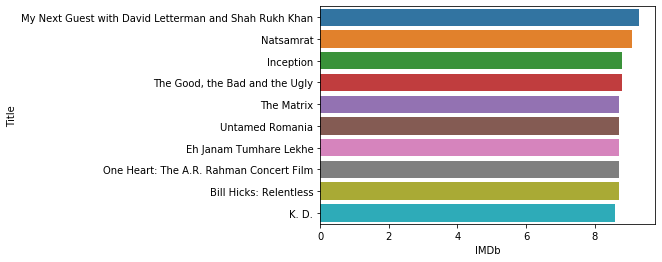

In [208]:
# Top 10 rated movies on netflix

sns.barplot(Top_rate_netflix['IMDb'] ,Top_rate_netflix['Title'])

# Top Viewing on each plateform by genre

In [216]:
Netflix_top = MovieDataSet.loc[MovieDataSet['Netflix'] == 1][['Title','Genres','IMDb']].sort_values('IMDb',ascending = False)
Netflix_top.head(10)


,Title,Genres,IMDb
1292,My Next Guest with David Letterman and Shah Ru...,Talk-Show,9.3
947,Natsamrat,"Drama,Family",9.1
4,"The Good, the Bad and the Ugly",Western,8.8
0,Inception,"Action,Adventure,Sci-Fi,Thriller",8.8
1214,Bill Hicks: Relentless,"Documentary,Comedy",8.7
1311,Eh Janam Tumhare Lekhe,Biography,8.7
1,The Matrix,"Action,Sci-Fi",8.7
1979,One Heart: The A.R. Rahman Concert Film,"Documentary,Music",8.7
1458,Untamed Romania,Documentary,8.7
1356,Merku Thodarchi Malai,Drama,8.6


In [217]:
Hulu_top = MovieDataSet.loc[MovieDataSet['Hulu'] == 1][['Title','Genres','IMDb']].sort_values('IMDb',ascending = False)
Hulu_top.head(10)

,Title,Genres,IMDb
3560,The Dark Knight,"Action,Crime,Drama,Thriller",9.0
3561,GoodFellas,"Biography,Crime,Drama",8.7
3562,Parasite,"Comedy,Drama,Thriller",8.6
3564,The Green Mile,"Crime,Drama,Fantasy,Mystery",8.6
3566,Grave of the Fireflies,"Animation,Drama,War",8.5
4283,Brad Paisley Thinks He's Special,Music,8.5
3742,Andy Irons: Kissed by God,Documentary,8.3
3890,Larger than Life: The Kevyn Aucoin Story,Documentary,8.3
3563,Good Will Hunting,"Drama,Romance",8.3
3577,Portrait of a Lady on Fire,"Drama,Romance",8.2


In [220]:
Prime_top = MovieDataSet.loc[MovieDataSet['Prime Video'] == 1][['Title','Genres','IMDb']].sort_values('IMDb',ascending = False)
Prime_top.head(10)

,Title,Genres,IMDb
6566,Square One,"Documentary,Drama,Music",9.3
5110,Love on a Leash,"Comedy,Drama,Fantasy,Romance",9.3
6837,Steven Banks: Home Entertainment Center,Comedy,9.3
7220,"Down, But Not Out!","Documentary,Sport",9.3
7426,Bounty,"Adventure,Drama,History,Romance",9.3
8458,Where's Daddy?,Documentary,9.1
7491,Finding Family,"Documentary,Family,History,War",9.1
7267,A Dog Named Gucci,"Documentary,Biography,Drama,News",9.0
7002,Escape from Firebase Kate,Documentary,9.0
8169,The Creators,"Documentary,History,Music,News",8.9


In [219]:
Disney_top = MovieDataSet.loc[MovieDataSet['Disney+'] == 1][['Title','Genres','IMDb']].sort_values('IMDb',ascending = False)
Disney_top.head(10)

,Title,Genres,IMDb
16213,Star Wars: The Empire Strikes Back,"Action,Adventure,Fantasy,Sci-Fi",8.7
16212,Star Wars: A New Hope,"Action,Adventure,Fantasy,Sci-Fi",8.6
16441,Newsies: The Broadway Musical,Musical,8.5
16214,The Lion King,"Animation,Adventure,Drama,Family,Musical",8.5
16221,Coco,"Animation,Adventure,Family,Fantasy,Music,Mystery",8.4
16217,WALL·E,"Animation,Adventure,Family,Sci-Fi",8.4
16216,Avengers: Endgame,"Action,Adventure,Drama,Sci-Fi",8.4
16309,Before the Flood,Documentary,8.3
16582,Phineas and Ferb: Mission Marvel,"Animation,Action,Comedy,Family,Musical,Sci-Fi",8.3
16224,Star Wars: Return of the Jedi,"Action,Adventure,Fantasy,Sci-Fi",8.3
